In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import talib as ta


In [18]:
end_date = datetime.today()
start_date = end_date - timedelta(days= 365 * 2)
Ticker = 'CBA.AX'
df = yf.download(Ticker, start_date, end_date)
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=14)

[*********************100%%**********************]  1 of 1 completed


In [19]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2022-08-11,101.400002,102.160004,100.180000,100.849998,92.740242,2725288,62.229315
2022-08-12,100.150002,100.349998,99.459999,100.339996,92.271263,2721743,59.604159
2022-08-15,100.430000,101.059998,100.160004,100.459999,92.381607,1503959,60.031386
2022-08-16,101.099998,101.750000,100.550003,101.459999,93.301201,1989122,63.496293
2022-08-17,100.400002,100.459999,99.620003,99.620003,93.545341,3400334,64.379180


In [20]:

df['Positions'] = 0

df['Positions'] = np.select([df['RSI']<30, df['RSI']>70], [1,-1], default=0)
df['Signals'] = df['Positions'].diff()

df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Positions,Signals
Date,,,,,,,,,
2022-08-12,100.150002,100.349998,99.459999,100.339996,92.271263,2721743,59.604159,0,0.0
2022-08-15,100.430000,101.059998,100.160004,100.459999,92.381607,1503959,60.031386,0,0.0
2022-08-16,101.099998,101.750000,100.550003,101.459999,93.301201,1989122,63.496293,0,0.0
2022-08-17,100.400002,100.459999,99.620003,99.620003,93.545341,3400334,64.379180,0,0.0
2022-08-18,99.970001,101.089996,99.680000,100.989998,94.831802,2811590,68.678083,0,0.0


In [21]:
buys = df.loc[df['Signals'] == 1]
sells = df.loc[df['Signals'] == -1]

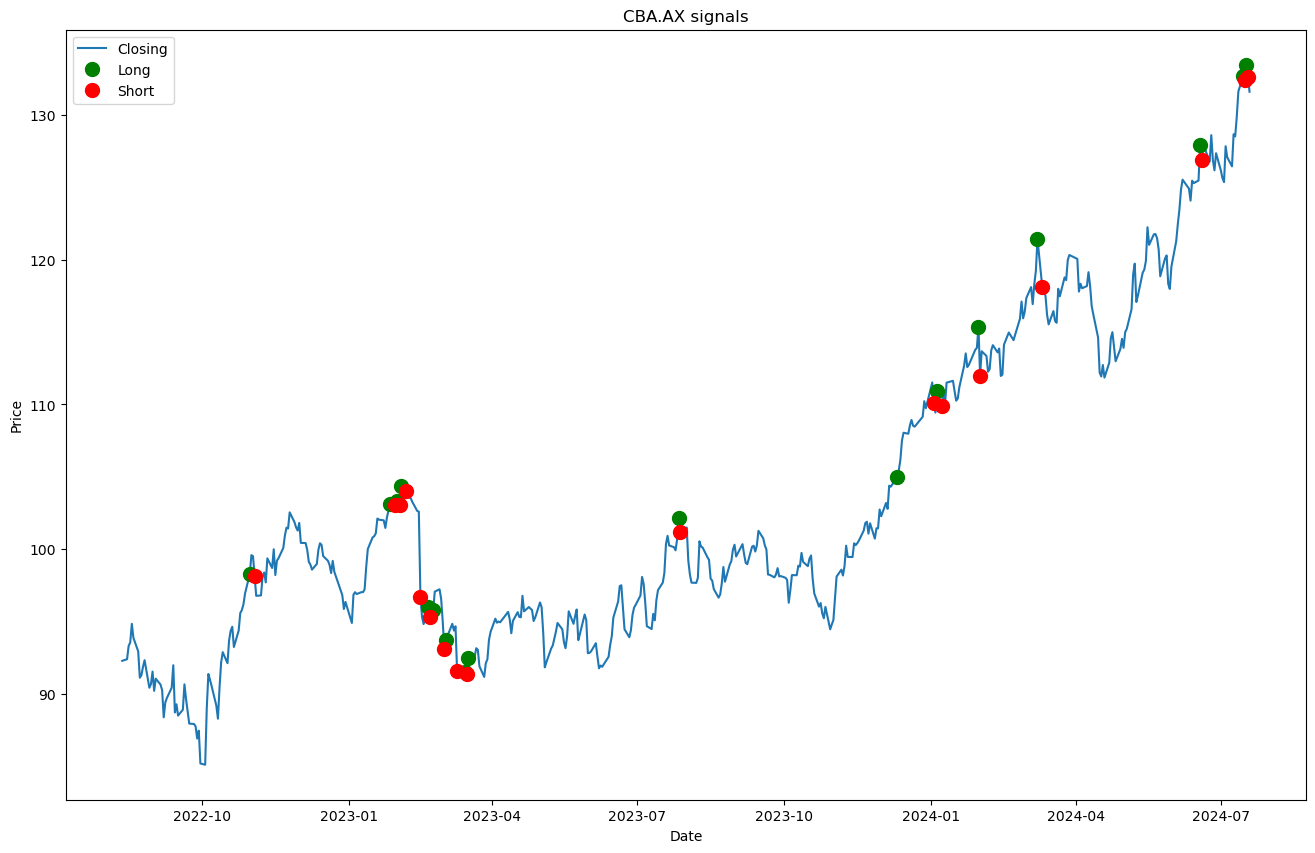

In [22]:
buys = df.loc[df['Signals'] == 1]
sells = df.loc[df['Signals'] == -1]

plt.figure(figsize=(16,10))
plt.plot(df.index, df['Adj Close'], label='Closing')
plt.plot(sells.index, df.loc[sells.index]['Adj Close'],'go', markersize=10, color='g', label='Long')
plt.plot(buys.index, df.loc[buys.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short')
plt.title(Ticker + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

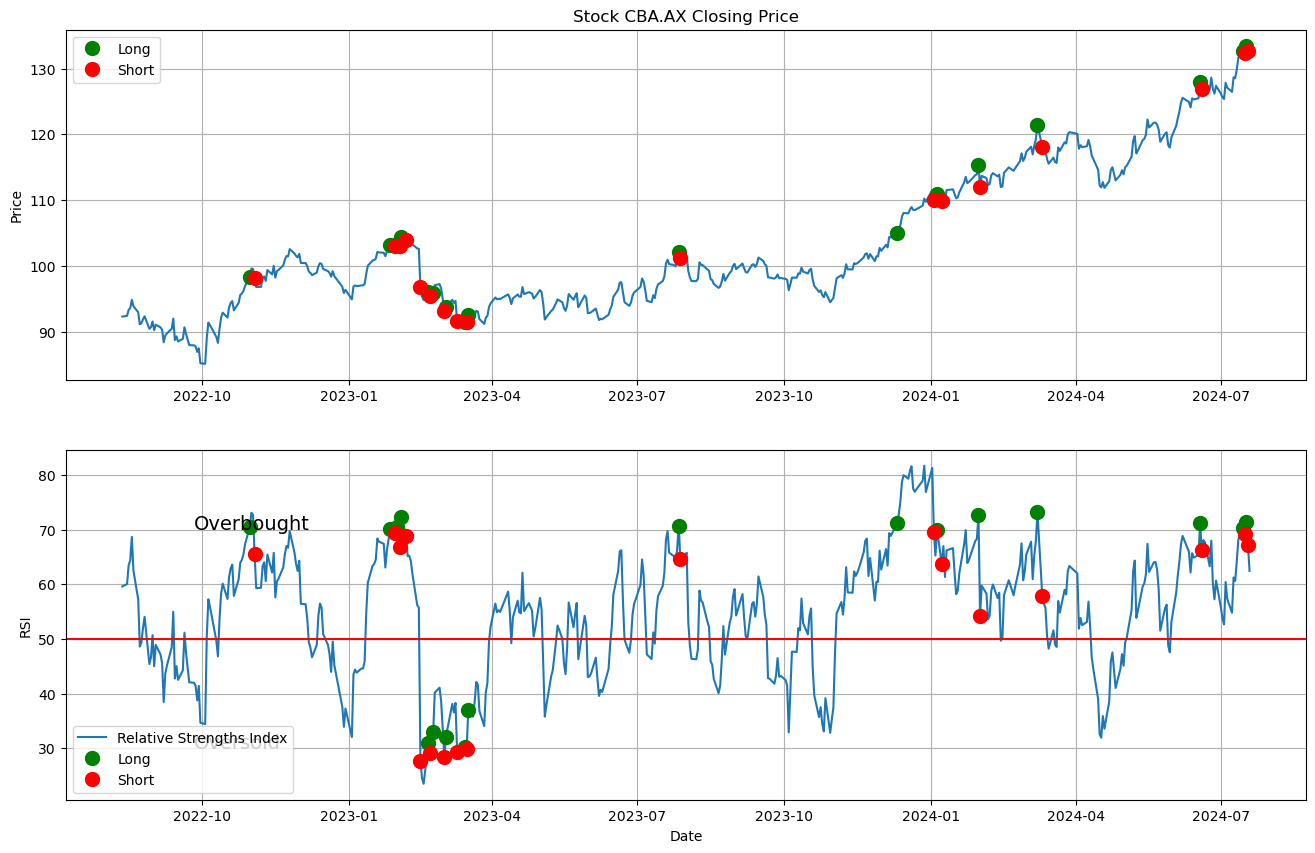

In [23]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(sells.index, df.loc[sells.index]['Adj Close'],'go', markersize=10, color='g', label='Long')
ax1.plot(buys.index, df.loc[buys.index]['Adj Close'], 'ro', markersize=10, color='r', label='Short')
ax1.set_title('Stock '+ Ticker +' Closing Price')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.plot(sells.index, df.loc[sells.index]['RSI'],'go', markersize=10, color='g', label='Long')
ax2.plot(buys.index, df.loc[buys.index]['RSI'], 'ro', markersize=10, color='r', label='Short')
ax2.axhline(y=50, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()
